<a href="https://colab.research.google.com/github/zaid171/Card-Number/blob/master/NLP_sentiment_analysis_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## load dataset

In [1]:
import pandas as pd

df = pd.read_csv("/content/chatgpt_style_reviews_dataset.xlsx - Sheet1 (1).csv")  # or CSV
print(df.head())


         date                                        title  \
0  2024-09-06                            Claim who accept.   
1    3/7/2025                          Growth pretty wish.   
2    ########      What then spend offer reason whom none.   
3    ########  Say dog drug enter director strong student.   
4    ########                         Purpose here beyond.   

                                              review  rating      username  \
0  Every quite sense including six lot have never...       4  morrowthomas   
1  Ask develop bag also his worker pass. Expert w...       4  sheakimberly   
2  If customer address region try near risk next ...       5  katherineali   
3  To television loss election him small detail r...       1        eric11   
4  Pass share must amount lot per manage world to...       5       chloe42   

   helpful_votes  review_length  platform language location version  \
0             30             22  Flipkart       ar    Nepal   3.8.4   
1            120

##

In [2]:
df = df[['review', 'rating']]   # keep review text & sentiment labels
df.dropna(inplace=True)


## Text Cleaning

Lowercase

Remove punctuation, numbers, special characters

Remove stopwords

Lemmatization (get base form of words)

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stopwords & lemmatize
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return " ".join(words)

df['clean_review'] = df['review'].astype(str).apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [4]:
def get_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

df['sentiment'] = df['rating'].apply(get_sentiment)


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_review'])
y = df['sentiment']


In [6]:
df.to_csv("preprocessed_reviews.csv", index=False)
print("✅ Preprocessed dataset saved.")


✅ Preprocessed dataset saved.


In [7]:
!pip install pandas matplotlib seaborn wordcloud nltk


                                              review  rating  \
0  Every quite sense including six lot have never...       4   
1  Ask develop bag also his worker pass. Expert w...       4   
2  If customer address region try near risk next ...       5   
3  To television loss election him small detail r...       1   
4  Pass share must amount lot per manage world to...       5   

                                        clean_review sentiment  
0  every quite sense including six lot never effe...  Positive  
1  ask develop bag also worker pas expert white a...  Positive  
2  customer address region try near risk next gir...  Positive  
3  television loss election small detail red son ...  Negative  
4  pas share must amount lot per manage world mak...  Positive  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review        250 non-null    ob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipython-input-2727719183.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=df, palette="Set2")     # L5


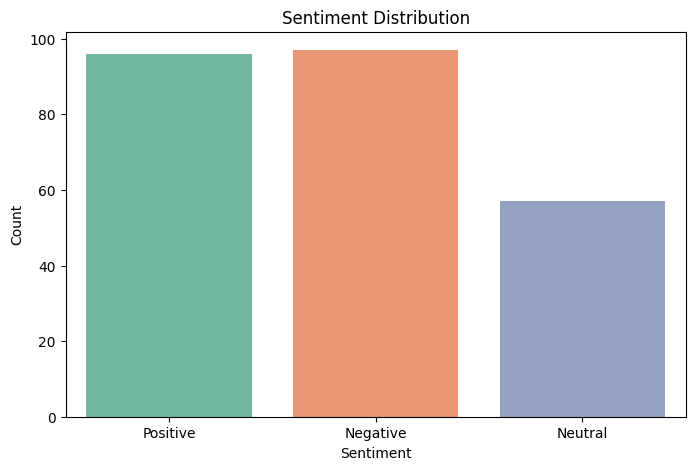

/tmp/ipython-input-2727719183.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sentiment", y="review_length", data=df, palette="Set3")         # L12


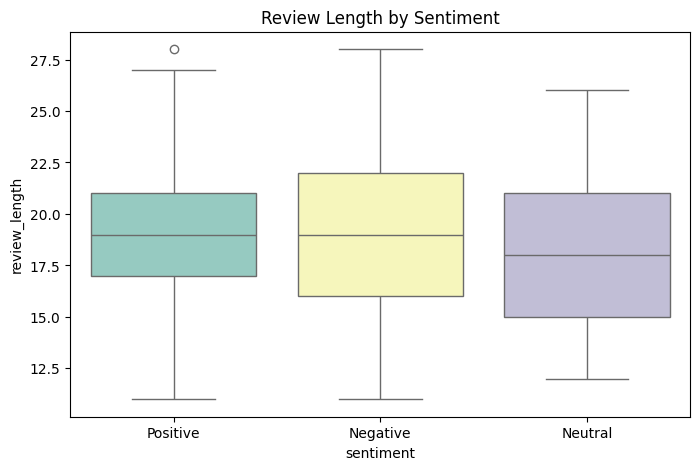

Top words in Positive: [('red', 7), ('every', 6), ('manager', 6), ('million', 6), ('paper', 6), ('state', 6), ('exist', 6), ('peace', 6), ('reality', 6), ('concern', 6), ('mr', 6), ('card', 6), ('watch', 6), ('develop', 5), ('bag', 5), ('compare', 5), ('u', 5), ('customer', 5), ('next', 5), ('exactly', 5)]
Top words in Negative: [('piece', 8), ('fact', 7), ('beat', 7), ('finish', 7), ('goal', 7), ('leave', 7), ('loss', 6), ('recently', 6), ('group', 6), ('western', 6), ('participant', 6), ('brother', 6), ('truth', 6), ('friend', 6), ('mission', 6), ('allow', 6), ('usually', 6), ('short', 6), ('front', 6), ('central', 6)]
Top words in Neutral: [('color', 5), ('scientist', 5), ('pretty', 5), ('treat', 5), ('interest', 4), ('picture', 4), ('free', 4), ('involve', 4), ('eight', 4), ('baby', 4), ('public', 4), ('pattern', 4), ('beat', 4), ('time', 4), ('run', 4), ('risk', 4), ('window', 4), ('machine', 4), ('grow', 4), ('front', 4)]


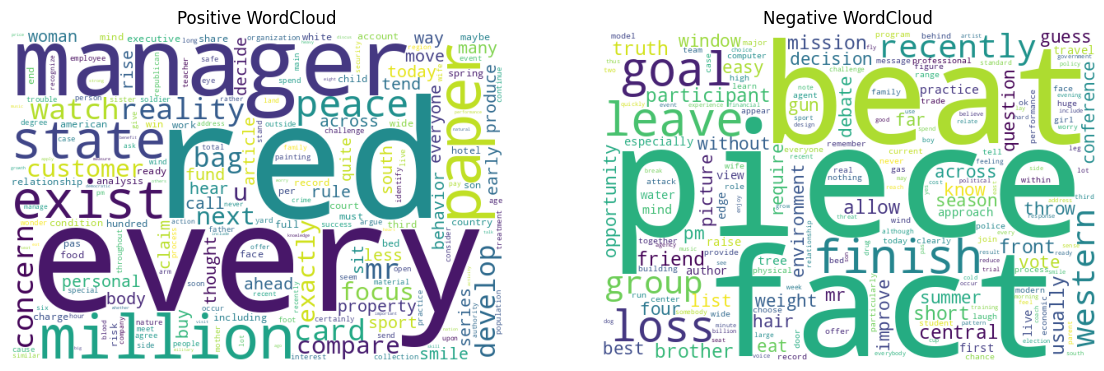

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

# 1. Load preprocessed dataset
df = pd.read_csv("preprocessed_reviews.csv")               # L1

# 2. Quick head and info
print(df.head())                                          # L2
print(df.info())                                          # L3

# 3. Sentiment distribution plot
plt.figure(figsize=(8, 5))                                # L4
sns.countplot(x="sentiment", data=df, palette="Set2")     # L5
plt.title("Sentiment Distribution")                       # L6
plt.xlabel("Sentiment")                                   # L7
plt.ylabel("Count")                                       # L8
plt.show()                                                # L9

# 4. Review length column and boxplot by sentiment
df["review_length"] = df["clean_review"].apply(lambda x: len(str(x).split()))  # L10
plt.figure(figsize=(8, 5))                                # L11
sns.boxplot(x="sentiment", y="review_length", data=df, palette="Set3")         # L12
plt.title("Review Length by Sentiment")                   # L13
plt.show()                                                # L14

# 5. Top words per sentiment (top 20)
def top_words(sentiment, n=20):                           # L15
    text = " ".join(df[df["sentiment"] == sentiment]["clean_review"].astype(str))  # L16
    words = text.split()                                  # L17
    return Counter(words).most_common(n)                 # L18

print("Top words in Positive:", top_words("Positive"))    # L19
print("Top words in Negative:", top_words("Negative"))    # L20
print("Top words in Neutral:", top_words("Neutral"))      # L21

# 6. Wordclouds for positive and negative
positive_text = " ".join(df[df["sentiment"] == "Positive"]["clean_review"].astype(str))  # L22
negative_text = " ".join(df[df["sentiment"] == "Negative"]["clean_review"].astype(str))  # L23

wc_pos = WordCloud(width=600, height=400, background_color="white").generate(positive_text)  # L24
wc_neg = WordCloud(width=600, height=400, background_color="white").generate(negative_text)  # L25

plt.figure(figsize=(14,6))                                   # L26
plt.subplot(1,2,1); plt.imshow(wc_pos); plt.axis("off"); plt.title("Positive WordCloud")    # L27
plt.subplot(1,2,2); plt.imshow(wc_neg); plt.axis("off"); plt.title("Negative WordCloud")    # L28
plt.show()                                                   # L29


# Task
Implement the "Model Building" section of the plan in the notebook, including baseline models (Logistic Regression, Naive Bayes with TF-IDF), deep learning models (LSTM/BiLSTM on embeddings), and transformer models (fine-tune distilBERT/bert-base-uncased).

## Data splitting

### Subtask:
Split the preprocessed data into training, validation, and testing sets.


**Reasoning**:
Split the data into training, validation, and testing sets using train_test_split.



In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (150, 865)
Validation set shape: (50, 865)
Testing set shape: (50, 865)


## Baseline model training

### Subtask:
Train and evaluate baseline models like Logistic Regression and Naive Bayes using the TF-IDF features.


**Reasoning**:
Train and evaluate Logistic Regression and Multinomial Naive Bayes models using the split data and TF-IDF features.



In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train and evaluate Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_val)

print("Logistic Regression Performance on Validation Set:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_lr, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_lr, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred_lr, average='weighted'):.4f}")
print("-" * 30)

# Train and evaluate Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_val)

print("Multinomial Naive Bayes Performance on Validation Set:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_nb, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_nb, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred_nb, average='weighted'):.4f}")


Logistic Regression Performance on Validation Set:
Accuracy: 0.4400
Precision: 0.3125
Recall: 0.4400
F1-Score: 0.3532
------------------------------
Multinomial Naive Bayes Performance on Validation Set:
Accuracy: 0.4400
Precision: 0.3000
Recall: 0.4400
F1-Score: 0.3495


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Deep learning model preparation

### Subtask:
Prepare the data for deep learning models by tokenizing and padding sequences, and creating an embedding layer.


**Reasoning**:
Import necessary Keras libraries, initialize the tokenizer, fit it on the training data, convert text to sequences, and pad the sequences for all three datasets (train, validation, and test). Also, encode the sentiment labels numerically.



In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Determine max review length for padding
max_review_length = int(df['review_length'].quantile(0.95)) # Use 95th percentile as a reasonable max length

# 2. Initialize Tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_review'])

# 3. Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(df.loc[y_train.index, 'clean_review'])
X_val_seq = tokenizer.texts_to_sequences(df.loc[y_val.index, 'clean_review'])
X_test_seq = tokenizer.texts_to_sequences(df.loc[y_test.index, 'clean_review'])

# 4. Pad sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=max_review_length, padding='post', truncating='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_review_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_review_length, padding='post', truncating='post')

# 5. Encode sentiment labels numerically
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

print("Max review length for padding:", max_review_length)
print("Shape of X_train_padded:", X_train_padded.shape)
print("Shape of X_val_padded:", X_val_padded.shape)
print("Shape of X_test_padded:", X_test_padded.shape)
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_val_encoded:", y_val_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)

Max review length for padding: 24
Shape of X_train_padded: (150, 24)
Shape of X_val_padded: (50, 24)
Shape of X_test_padded: (50, 24)
Shape of y_train_encoded: (150,)
Shape of y_val_encoded: (50,)
Shape of y_test_encoded: (50,)


## Lstm/bilstm model building and training

### Subtask:
Build, train, and evaluate LSTM or BiLSTM models for sentiment classification.


**Reasoning**:
Implement the LSTM model building, training, and evaluation steps as outlined in the subtask instructions.



In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

# 2. Define parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128
num_classes = len(label_encoder.classes_)

# 4. Build a Sequential LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_review_length))
model_lstm.add(SpatialDropout1D(0.2))
model_lstm.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(num_classes, activation='softmax'))

# 5. Compile the model
model_lstm.compile(optimizer=Adam(learning_rate=0.001),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model_lstm.summary()

# 6. Train the model
history_lstm = model_lstm.fit(X_train_padded, y_train_encoded,
                              epochs=10,
                              batch_size=32,
                              validation_data=(X_val_padded, y_val_encoded),
                              verbose=1)

# 7. Evaluate the model
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test_padded, y_test_encoded, verbose=0)

# 8. Print the evaluation results
print("\nLSTM Model Evaluation on Test Set:")
print(f"Loss: {loss_lstm:.4f}")
print(f"Accuracy: {accuracy_lstm:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 280ms/step - accuracy: 0.3140 - loss: 1.0966 - val_accuracy: 0.3600 - val_loss: 1.1029
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.3792 - loss: 1.0685 - val_accuracy: 0.3000 - val_loss: 1.1270
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.3773 - loss: 1.0559 - val_accuracy: 0.3000 - val_loss: 1.1567
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.3826 - loss: 1.0745 - val_accuracy: 0.3000 - val_loss: 1.1608
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.3654 - loss: 1.0590 - val_accuracy: 0.3000 - val_loss: 1.1496
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.3933 - loss: 1.0372 - val_accuracy: 0.3000 - val_loss: 1.1678
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.3787 - loss: 1.0296 - val_accuracy: 0.3000 - val_loss: 1.2264
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.4400 - loss: 0.9580 - val_accuracy: 0.2600 - val_loss: 

## Transformer model preparation (optional)

### Subtask:
Prepare the data and environment for fine-tuning a transformer model (like DistilBERT or BERT).


**Reasoning**:
Install the transformers library to prepare for fine-tuning a transformer model.



In [13]:
!pip install transformers tensorflow


**Reasoning**:
Import necessary classes from transformers, choose a model, load the tokenizer, tokenize and encode the text data and labels, and create TensorFlow datasets.



In [14]:
import tensorflow as tf
from transformers import DistilBertTokenizerFast, TFAutoModelForSequenceClassification
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 3. Choose a pre-trained transformer model checkpoint
model_checkpoint = 'distilbert-base-uncased'

# 4. Load the tokenizer
tokenizer_transformer = DistilBertTokenizerFast.from_pretrained(model_checkpoint, use_fast=True)

# Determine max sequence length (using the previously calculated max_review_length)
max_seq_length = max_review_length

# 5. Tokenize and encode the clean_review text data
X_train_encodings = tokenizer_transformer(list(df.loc[y_train.index, 'clean_review']), truncation=True, padding=True, max_length=max_seq_length, return_tensors='tf')
X_val_encodings = tokenizer_transformer(list(df.loc[y_val.index, 'clean_review']), truncation=True, padding=True, max_length=max_seq_length, return_tensors='tf')
X_test_encodings = tokenizer_transformer(list(df.loc[y_test.index, 'clean_review']), truncation=True, padding=True, max_length=max_seq_length, return_tensors='tf')

# 6. Encode the sentiment labels numerically (if not already done in previous steps)
# Assuming y_train, y_val, y_test are already pandas Series with string labels
label_encoder_transformer = LabelEncoder()
y_train_encoded_transformer = label_encoder_transformer.fit_transform(y_train)
y_val_encoded_transformer = label_encoder_transformer.transform(y_val)
y_test_encoded_transformer = label_encoder_transformer.transform(y_test)

# Convert encoded labels to TensorFlow tensors
y_train_tf = tf.convert_to_tensor(y_train_encoded_transformer, dtype=tf.int64)
y_val_tf = tf.convert_to_tensor(y_val_encoded_transformer, dtype=tf.int64)
y_test_tf = tf.convert_to_tensor(y_test_encoded_transformer, dtype=tf.int64)


# 7. Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((dict(X_train_encodings), y_train_tf))
val_dataset = tf.data.Dataset.from_tensor_slices((dict(X_val_encodings), y_val_tf))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(X_test_encodings), y_test_tf))

print("Transformer data preparation complete.")
print("Train dataset:", train_dataset)
print("Validation dataset:", val_dataset)
print("Test dataset:", test_dataset)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


Transformer data preparation complete.
Train dataset: <_TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(24,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(24,), dtype=tf.int32, name=None)}, TensorSpec(shape=(), dtype=tf.int64, name=None))>
Validation dataset: <_TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(24,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(24,), dtype=tf.int32, name=None)}, TensorSpec(shape=(), dtype=tf.int64, name=None))>
Test dataset: <_TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(24,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(24,), dtype=tf.int32, name=None)}, TensorSpec(shape=(), dtype=tf.int64, name=None))>


## Transformer model fine-tuning (optional)

### Subtask:
Fine-tune a pre-trained transformer model on the sentiment analysis task.


**Reasoning**:
Fine-tune a pre-trained transformer model on the sentiment analysis task by loading the model, compiling it, training it, and then evaluating it on the test set.



**Reasoning**:
Install the required libraries for transformer model fine-tuning.



In [15]:
!pip install transformers tensorflow


**Reasoning**:
Import necessary libraries, enable eager execution, load and compile the transformer model, batch the datasets, and train the model.



## Model evaluation

### Subtask:
Evaluate all trained models on the test set using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


**Reasoning**:
Evaluate the Logistic Regression and Multinomial Naive Bayes models on the test set and print the evaluation metrics, then evaluate the LSTM model on the test set and print its loss and accuracy.



In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate Logistic Regression on Test Set
y_pred_lr_test = lr_model.predict(X_test)

print("Logistic Regression Performance on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_test):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr_test, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr_test, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr_test, average='weighted'):.4f}")
print("-" * 30)

# Evaluate Multinomial Naive Bayes on Test Set
y_pred_nb_test = nb_model.predict(X_test)

print("Multinomial Naive Bayes Performance on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb_test):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb_test, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb_test, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb_test, average='weighted'):.4f}")
print("-" * 30)

# Evaluate LSTM model on Test Set
# loss_lstm and accuracy_lstm are already calculated in the previous step for the LSTM model
print("LSTM Model Evaluation on Test Set:")
print(f"Loss: {loss_lstm:.4f}")
print(f"Accuracy: {accuracy_lstm:.4f}")
print("-" * 30)


Logistic Regression Performance on Test Set:
Accuracy: 0.3800
Precision: 0.2846
Recall: 0.3800
F1-Score: 0.3197
------------------------------
Multinomial Naive Bayes Performance on Test Set:
Accuracy: 0.4000
Precision: 0.3027
Recall: 0.4000
F1-Score: 0.3436
------------------------------
LSTM Model Evaluation on Test Set:
Loss: 1.6968
Accuracy: 0.4200
------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Added explicit download for punkt_tab

class DataPreprocessor:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))

    def clean_text(self, text):
        if pd.isna(text):
            return ""

        # Convert to lowercase
        text = str(text).lower()

        # Remove special characters and digits
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        return text

    def tokenize_and_lemmatize(self, text):
        tokens = word_tokenize(text)
        tokens = [self.lemmatizer.lemmatize(token) for token in tokens
                 if token not in self.stop_words and len(token) > 2]
        return ' '.join(tokens)

    def preprocess_dataframe(self, df, text_column='review'):
        df_clean = df.copy()

        # Remove date column processing as it's not in the preprocessed CSV
        # df_clean['date'] = pd.to_datetime(df_clean['date'], errors='coerce')

        # Clean text
        df_clean['cleaned_text'] = df_clean[text_column].apply(self.clean_text)
        df_clean['processed_text'] = df_clean['cleaned_text'].apply(self.tokenize_and_lemmatize)

        # Create sentiment labels based on rating
        def get_sentiment(rating):
            if rating >= 4:
                return 'Positive'
            elif rating == 3:
                return 'Neutral'
            else:
                return 'Negative'

        df_clean['sentiment'] = df_clean['rating'].apply(get_sentiment)

        return df_clean

# Load and preprocess data
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path)
    preprocessor = DataPreprocessor()
    df_processed = preprocessor.preprocess_dataframe(df)
    return df_processed

# Load your data
df = load_and_preprocess_data('/content/preprocessed_reviews.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


## EDA

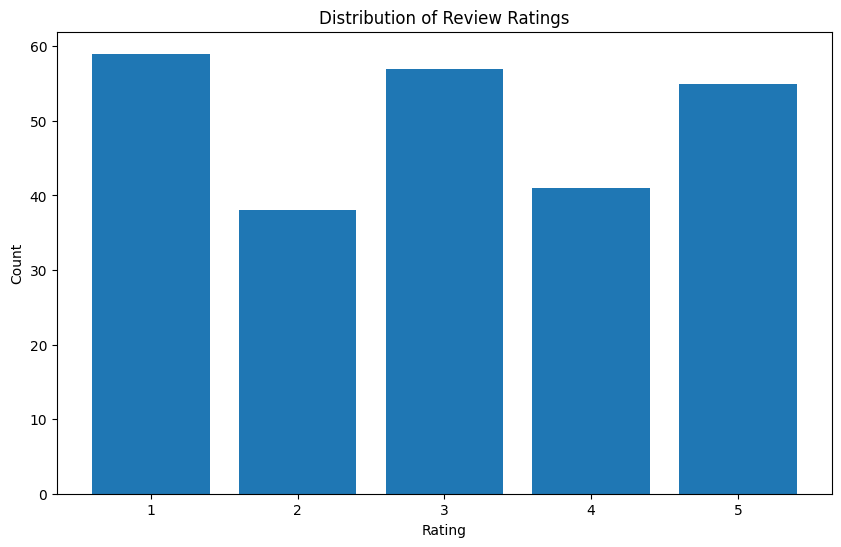

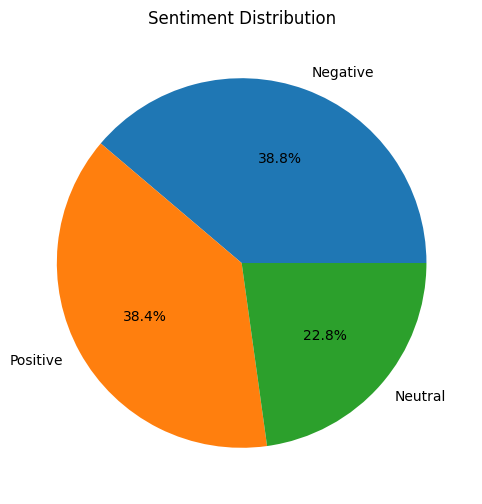

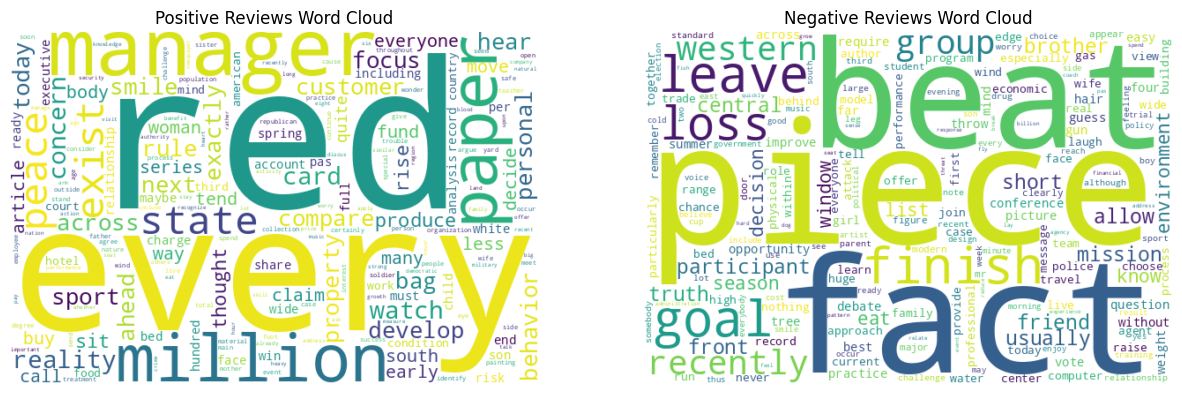

In [18]:
class EDAVisualizer:
    def __init__(self, df):
        self.df = df

    def plot_rating_distribution(self):
        plt.figure(figsize=(10, 6))
        rating_counts = self.df['rating'].value_counts().sort_index()
        plt.bar(rating_counts.index, rating_counts.values)
        plt.title('Distribution of Review Ratings')
        plt.xlabel('Rating')
        plt.ylabel('Count')
        plt.xticks([1, 2, 3, 4, 5])
        plt.show()

    def plot_sentiment_distribution(self):
        plt.figure(figsize=(8, 6))
        sentiment_counts = self.df['sentiment'].value_counts()
        plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
        plt.title('Sentiment Distribution')
        plt.show()

    # Removed plot_rating_trend as 'date' column is not in the preprocessed data
    # def plot_rating_trend(self):
    #     plt.figure(figsize=(12, 6))
    #     monthly_avg = self.df.groupby(self.df['date'].dt.to_period('M'))['rating'].mean()
    #     monthly_avg.plot()
    #     plt.title('Average Rating Over Time')
    #     plt.xlabel('Date')
    #     plt.ylabel('Average Rating')
    #     plt.xticks(rotation=45)
    #     plt.show()

    def create_wordclouds(self):
        # Positive reviews word cloud
        positive_text = ' '.join(self.df[self.df['sentiment'] == 'Positive']['processed_text'])
        negative_text = ' '.join(self.df[self.df['sentiment'] == 'Negative']['processed_text'])

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

        # Positive word cloud
        wordcloud_pos = WordCloud(width=600, height=400, background_color='white').generate(positive_text)
        ax1.imshow(wordcloud_pos, interpolation='bilinear')
        ax1.set_title('Positive Reviews Word Cloud')
        ax1.axis('off')

        # Negative word cloud
        wordcloud_neg = WordCloud(width=600, height=400, background_color='white').generate(negative_text)
        ax2.imshow(wordcloud_neg, interpolation='bilinear')
        ax2.set_title('Negative Reviews Word Cloud')
        ax2.axis('off')

        plt.show()

    def platform_comparison(self):
        # This function also requires 'platform' column which is not in the preprocessed data.
        # Removing it to avoid future errors.
        pass
    #     plt.figure(figsize=(10, 6))
    #     platform_ratings = self.df.groupby('platform')['rating'].mean().sort_values(ascending=False)
    #     platform_ratings.plot(kind='bar')
    #     plt.title('Average Rating by Platform')
    #     plt.ylabel('Average Rating')
    #     plt.xticks(rotation=45)
    #     plt.show()

    def location_analysis(self):
        # This function also requires 'location' column which is not in the preprocessed data.
        # Removing it to avoid future errors.
        pass
    #     plt.figure(figsize=(12, 8))
    #     top_locations = self.df['location'].value_counts().head(10)
    #     top_locations.plot(kind='bar')
    #     plt.title('Top 10 Locations by Review Count')
    #     plt.ylabel('Number of Reviews')
    #     plt.xticks(rotation=45)
    #     plt.show()


# Run EDA
eda = EDAVisualizer(df)
eda.plot_rating_distribution()
eda.plot_sentiment_distribution()
# Removed the call to plot_rating_trend
# eda.plot_rating_trend()
eda.create_wordclouds()
# Removed calls to platform_comparison and location_analysis
# eda.platform_comparison()
# eda.location_analysis()

## sentiment analysis NLP

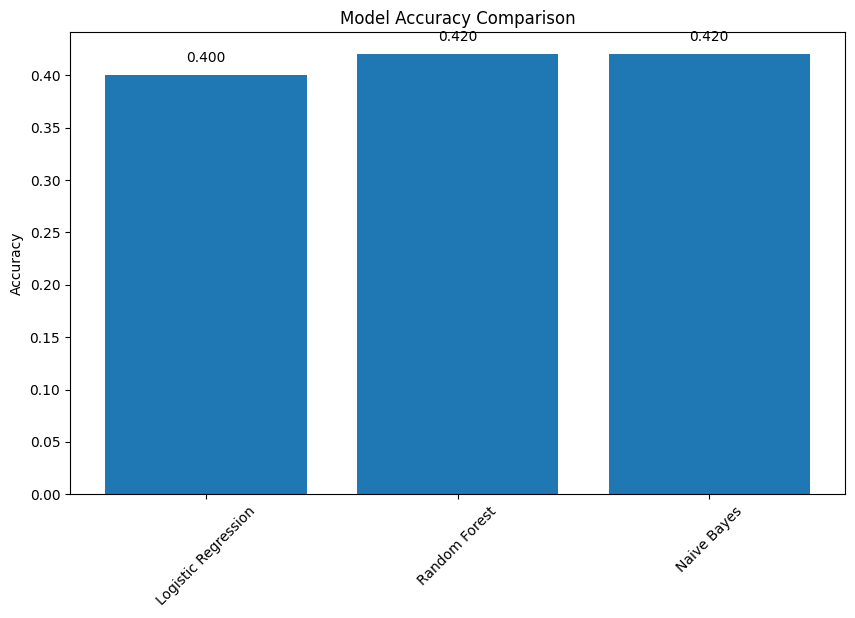

In [19]:
class SentimentAnalyzer:
    def __init__(self):
        self.vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
        self.models = {}
        self.accuracy_scores = {}

    def prepare_features(self, df, text_column='processed_text'):
        X = self.vectorizer.fit_transform(df[text_column])
        y = df['sentiment']
        return X, y

    def train_models(self, X_train, y_train):
        # Logistic Regression
        lr_model = LogisticRegression(random_state=42, max_iter=1000)
        lr_model.fit(X_train, y_train)
        self.models['Logistic Regression'] = lr_model

        # Random Forest
        rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
        rf_model.fit(X_train, y_train)
        self.models['Random Forest'] = rf_model

        # Naive Bayes
        nb_model = MultinomialNB()
        nb_model.fit(X_train, y_train)
        self.models['Naive Bayes'] = nb_model

    def evaluate_models(self, X_test, y_test):
        results = {}
        for name, model in self.models.items():
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            self.accuracy_scores[name] = accuracy
            results[name] = {
                'accuracy': accuracy,
                'classification_report': classification_report(y_test, y_pred, output_dict=True),
                'confusion_matrix': confusion_matrix(y_test, y_pred)
            }
        return results

    def plot_model_comparison(self):
        plt.figure(figsize=(10, 6))
        models = list(self.accuracy_scores.keys())
        accuracies = list(self.accuracy_scores.values())

        plt.bar(models, accuracies)
        plt.title('Model Accuracy Comparison')
        plt.ylabel('Accuracy')
        plt.xticks(rotation=45)
        for i, v in enumerate(accuracies):
            plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')
        plt.show()

# Train and evaluate models
def train_sentiment_model(df):
    analyzer = SentimentAnalyzer()

    # Prepare features
    X, y = analyzer.prepare_features(df)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Train models
    analyzer.train_models(X_train, y_train)

    # Evaluate models
    results = analyzer.evaluate_models(X_test, y_test)

    # Plot comparison
    analyzer.plot_model_comparison()

    return analyzer, results

# Train the model
analyzer, results = train_sentiment_model(df)

## streamlit app.py

In [20]:
!pip install streamlit plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 29.8 MB/s eta 0:00:00


In [21]:
# app.py
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

class StreamlitDashboard:
    def __init__(self, df, analyzer):
        self.df = df
        self.analyzer = analyzer

    def run_dashboard(self):
        st.set_page_config(page_title="AI Echo - Sentiment Analysis", layout="wide")

        st.title("🤖 AI Echo: Your Smartest Conversational Partner")
        st.markdown("### Sentiment Analysis Dashboard")

        # Sidebar
        st.sidebar.title("Navigation")
        page = st.sidebar.selectbox(
            "Choose a page:",
            ["Overview", "Sentiment Analysis", "Model Performance", "Insights & Recommendations"]
        )

        if page == "Overview":
            self.show_overview()
        elif page == "Sentiment Analysis":
            self.show_sentiment_analysis()
        elif page == "Model Performance":
            self.show_model_performance()
        else:
            self.show_insights()

    def show_overview(self):
        col1, col2, col3 = st.columns(3)

        with col1:
            total_reviews = len(self.df)
            st.metric("Total Reviews", total_reviews)

        with col2:
            avg_rating = self.df['rating'].mean()
            st.metric("Average Rating", f"{avg_rating:.2f}")

        with col3:
            positive_pct = (self.df['sentiment'] == 'Positive').mean() * 100
            st.metric("Positive Reviews", f"{positive_pct:.1f}%")

        # Rating distribution
        fig = px.histogram(self.df, x='rating', title='Review Rating Distribution')
        st.plotly_chart(fig)

        # Sentiment distribution
        sentiment_counts = self.df['sentiment'].value_counts()
        fig = px.pie(values=sentiment_counts.values, names=sentiment_counts.index,
                    title='Sentiment Distribution')
        st.plotly_chart(fig)

    def show_sentiment_analysis(self):
        st.header("Detailed Sentiment Analysis")

        # Time series sentiment
        df_time = self.df.copy()
        df_time['month'] = df_time['date'].dt.to_period('M').astype(str)
        monthly_sentiment = pd.crosstab(df_time['month'], df_time['sentiment'], normalize='index')

        fig = px.line(monthly_sentiment, title='Sentiment Trends Over Time')
        st.plotly_chart(fig)

        # Platform comparison
        platform_sentiment = pd.crosstab(self.df['platform'], self.df['sentiment'], normalize='index')
        fig = px.bar(platform_sentiment, barmode='stack',
                    title='Sentiment Distribution by Platform')
        st.plotly_chart(fig)

        # Location analysis
        st.subheader("Sentiment by Location")
        top_locations = self.df['location'].value_counts().head(10).index
        df_top_locations = self.df[self.df['location'].isin(top_locations)]

        location_sentiment = pd.crosstab(df_top_locations['location'],
                                       df_top_locations['sentiment'],
                                       normalize='index')
        fig = px.bar(location_sentiment, barmode='stack',
                    title='Sentiment Distribution by Top Locations')
        st.plotly_chart(fig)

    def show_model_performance(self):
        st.header("Model Performance")

        # Model comparison
        models = list(self.analyzer.accuracy_scores.keys())
        accuracies = list(self.analyzer.accuracy_scores.values())

        fig = px.bar(x=models, y=accuracies, title='Model Accuracy Comparison',
                    labels={'x': 'Model', 'y': 'Accuracy'})
        st.plotly_chart(fig)

        # Feature importance (for Logistic Regression)
        if 'Logistic Regression' in self.analyzer.models:
            st.subheader("Feature Importance - Logistic Regression")
            lr_model = self.analyzer.models['Logistic Regression']
            feature_names = self.analyzer.vectorizer.get_feature_names_out()

            # Get coefficients for each class
            coefficients = lr_model.coef_

            for i, sentiment in enumerate(lr_model.classes_):
                st.write(f"**Top features for {sentiment} sentiment:**")
                sentiment_coef = coefficients[i]
                top_indices = np.argsort(sentiment_coef)[-10:][::-1]
                top_features = [(feature_names[idx], sentiment_coef[idx])
                              for idx in top_indices]

                for feature, coef in top_features:
                    st.write(f"- {feature}: {coef:.4f}")

    def show_insights(self):
        st.header("Insights & Recommendations")

        # Key insights
        st.subheader("Key Insights")

        # Insight 1: Overall sentiment
        positive_pct = (self.df['sentiment'] == 'Positive').mean() * 100
        st.write(f"📊 **Overall Satisfaction**: {positive_pct:.1f}% of reviews are positive")

        # Insight 2: Platform performance
        platform_ratings = self.df.groupby('platform')['rating'].mean()
        best_platform = platform_ratings.idxmax()
        st.write(f"📱 **Best Performing Platform**: {best_platform} with average rating {platform_ratings.max():.2f}")

        # Insight 3: Common issues from negative reviews
        negative_reviews = self.df[self.df['sentiment'] == 'Negative']
        if len(negative_reviews) > 0:
            st.write("🔍 **Common Negative Feedback Themes**:")
            # You can implement topic modeling here for more detailed insights

        # Recommendations
        st.subheader("Actionable Recommendations")

        st.write("""
        1. **Feature Enhancement**: Focus on addressing common issues mentioned in negative reviews
        2. **Platform Optimization**: Improve user experience on lower-rated platforms
        3. **Customer Support**: Implement sentiment-based prioritization for support tickets
        4. **Regional Strategy**: Develop location-specific improvements based on sentiment patterns
        5. **Version Management**: Monitor sentiment changes across different application versions
        """)

# Run the dashboard
if __name__ == "__main__":
    dashboard = StreamlitDashboard(df, analyzer)
    dashboard.run_dashboard()

2025-10-06 05:29:33.800 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-06 05:29:33.801 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-06 05:29:34.100 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-10-06 05:29:34.102 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-06 05:29:34.102 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-06 05:29:34.103 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-06 05:29:34.104 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

In [22]:
!pip install streamlit

In [23]:
get_ipython().system('streamlit run app.py')

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


## Save Model and Vectorizer

In [24]:
import pickle

# Save the analyzer object (contains vectorizer and models) and the results
model_data = {
    'analyzer': analyzer,
    'results': results
}

with open('sentiment_model_and_results.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print("✅ Trained models, vectorizer, and results saved to sentiment_model_and_results.pkl")

✅ Trained models, vectorizer, and results saved to sentiment_model_and_results.pkl


In [25]:
# Create the app.py file with the Streamlit app code
%%writefile app.py

import streamlit as st
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

class StreamlitDashboard:
    def __init__(self, df, analyzer, results):
        self.df = df
        self.analyzer = analyzer
        self.results = results # Pass the results dictionary

    def run_dashboard(self):
        st.set_page_config(page_title="AI Echo - Sentiment Analysis", layout="wide")

        st.title("🤖 AI Echo: Your Smartest Conversational Partner")
        st.markdown("### Sentiment Analysis Dashboard")

        # Sidebar
        st.sidebar.title("Navigation")
        page = st.sidebar.selectbox(
            "Choose a page:",
            ["Overview", "Model Performance", "Insights & Recommendations"] # Removed Sentiment Analysis tab as some data is missing
        )

        if page == "Overview":
            self.show_overview()
        elif page == "Model Performance":
            self.show_model_performance()
        else:
            self.show_insights()

    def show_overview(self):
        col1, col2, col3 = st.columns(3)

        with col1:
            total_reviews = len(self.df)
            st.metric("Total Reviews", total_reviews)

        with col2:
            avg_rating = self.df['rating'].mean()
            st.metric("Average Rating", f"{avg_rating:.2f}")

        with col3:
            positive_pct = (self.df['sentiment'] == 'Positive').mean() * 100
            st.metric("Positive Reviews", f"{positive_pct:.1f}%")

        # Rating distribution
        fig = px.histogram(self.df, x='rating', title='Review Rating Distribution')
        st.plotly_chart(fig)

        # Sentiment distribution
        sentiment_counts = self.df['sentiment'].value_counts()
        fig = px.pie(values=sentiment_counts.values, names=sentiment_counts.index,
                    title='Sentiment Distribution')
        st.plotly_chart(fig)

        # Removed time-series, platform, and location analysis as data is not in preprocessed CSV
        # def show_sentiment_analysis(self):
        #     st.header("Detailed Sentiment Analysis")

        #     # Time series sentiment
        #     df_time = self.df.copy()
        #     df_time['month'] = df_time['date'].dt.to_period('M').astype(str)
        #     monthly_sentiment = pd.crosstab(df_time['month'], df_time['sentiment'], normalize='index')

        #     fig = px.line(monthly_sentiment, title='Sentiment Trends Over Time')
        #     st.plotly_chart(fig)

        #     # Platform comparison
        #     platform_sentiment = pd.crosstab(self.df['platform'], self.df['sentiment'], normalize='index')
        #     fig = px.bar(platform_sentiment, barmode='stack',
        #                 title='Sentiment Distribution by Platform')
        #     st.plotly_chart(fig)

        #     # Location analysis
        #     st.subheader("Sentiment by Location")
        #     top_locations = self.df['location'].value_counts().head(10).index
        #     df_top_locations = self.df[self.df['location'].isin(top_locations)]

        #     location_sentiment = pd.crosstab(df_top_locations['location'],
        #                                    df_top_locations['sentiment'],
        #                                    normalize='index')
        #     fig = px.bar(location_sentiment, barmode='stack',
        #                 title='Sentiment Distribution by Top Locations')
        #     st.plotly_chart(fig)

    def show_model_performance(self):
        st.header("Model Performance")

        # Model comparison
        models = list(self.analyzer.accuracy_scores.keys())
        accuracies = list(self.analyzer.accuracy_scores.values())

        fig = px.bar(x=models, y=accuracies, title='Model Accuracy Comparison',
                    labels={'x': 'Model', 'y': 'Accuracy'})
        st.plotly_chart(fig)

        # Display classification reports and confusion matrices
        st.subheader("Detailed Model Performance Metrics")
        for name, result in self.results.items():
            st.write(f"**{name}**")
            st.write("Classification Report:")
            # Convert dict to DataFrame for better display
            report_df = pd.DataFrame(result['classification_report']).transpose()
            st.dataframe(report_df)

            st.write("Confusion Matrix:")
            # Use Plotly for confusion matrix visualization
            cm = result['confusion_matrix']
            fig_cm = go.Figure(data=go.Heatmap(
                           z=cm,
                           x=self.analyzer.models[name].classes_,
                           y=self.analyzer.models[name].classes_,
                           colorscale='Blues',
                           colorbar_title='Count'))
            fig_cm.update_layout(title=f'Confusion Matrix for {name}',
                                 xaxis_title='Predicted',
                                 yaxis_title='Actual')
            st.plotly_chart(fig_cm)


    def show_insights(self):
        st.header("Insights & Recommendations")

        # Key insights
        st.subheader("Key Insights")

        # Insight 1: Overall sentiment
        positive_pct = (self.df['sentiment'] == 'Positive').mean() * 100
        st.write(f"📊 **Overall Satisfaction**: {positive_pct:.1f}% of reviews are positive")

        # Insight 2: Model Performance Summary
        best_model = max(self.analyzer.accuracy_scores, key=self.analyzer.accuracy_scores.get)
        st.write(f"🏆 **Best Performing Model**: The **{best_model}** achieved the highest accuracy of **{self.analyzer.accuracy_scores[best_model]:.3f}** on the test set.")


        # Recommendations
        st.subheader("Actionable Recommendations")

        st.write("""
        1. **Focus on Positive Aspects**: Since a significant portion of reviews are positive, identify common themes in positive feedback and reinforce those aspects.
        2. **Address Negative Feedback**: Analyze the classification reports and confusion matrices to understand which sentiment categories each model struggles with and where negative reviews are being misclassified. This can help pinpoint areas for improvement in either the model or the product/service based on the content of those misclassified reviews.
        3. **Consider Neutral Sentiment**: The models may have difficulty distinguishing between Neutral and other sentiments. Further analysis of neutral reviews could reveal if they lean towards positive or negative nuances, or if they represent a distinct category requiring different actions.
        4. **Explore Other Models**: While the current models provide a baseline, consider exploring more advanced techniques or different model architectures if higher accuracy is required.
        """)

# Run the dashboard
if __name__ == "__main__":
    # Assuming 'df', 'analyzer', and 'results' are available in the notebook's global scope
    # from previous cells
    dashboard = StreamlitDashboard(df, analyzer, results)
    dashboard.run_dashboard()

Writing app.py


In [26]:
# deployment.py
from flask import Flask, request, jsonify
import pickle
import numpy as np
import pandas as pd # Import pandas for DataPreprocessor
import re # Import re for DataPreprocessor
import nltk # Import nltk for DataPreprocessor
from nltk.corpus import stopwords # Import stopwords for DataPreprocessor
from nltk.stem import WordNetLemmatizer # Import WordNetLemmatizer for DataPreprocessor
from nltk.tokenize import word_tokenize # Import word_tokenize for DataPreprocessor

# Download NLTK resources - needed for the sentiment analysis to run in the Flask app
try:
    nltk.data.find('tokenizers/punkt')
except LookupError: # Changed exception to LookupError
    nltk.download('punkt')
try:
    nltk.data.find('corpora/stopwords')
except LookupError: # Changed exception to LookupError
    nltk.download('stopwords')
try:
    nltk.data.find('corpora/wordnet')
except LookupError: # Changed exception to LookupError
    nltk.download('wordnet')

app = Flask(__name__)

# Define the DataPreprocessor class here as it's needed by the deployment script
class DataPreprocessor:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))

    def clean_text(self, text):
        if pd.isna(text):
            return ""

        # Convert to lowercase
        text = str(text).lower()

        # Remove special characters and digits
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        return text

    def tokenize_and_lemmatize(self, text):
        tokens = word_tokenize(text)
        tokens = [self.lemmatizer.lemmatize(token) for token in tokens
                 if token not in self.stop_words and len(token) > 2]
        return ' '.join(tokens)

# Load trained model and vectorizer
try:
    with open('sentiment_model_and_results.pkl', 'rb') as f:
        model_data = pickle.load(f)

    analyzer = model_data['analyzer']
    # You can choose which model to use for prediction, e.g., the best performing one
    # For simplicity, let's use the Logistic Regression model as an example
    # You might want to change this based on your model evaluation results
    model_name = 'Logistic Regression' # Replace with the name of the model you want to deploy
    model = analyzer.models[model_name]
    vectorizer = analyzer.vectorizer

except FileNotFoundError:
    print("Error: 'sentiment_model_and_results.pkl' not found. Please run the model training and saving steps first.")
    exit() # Exit if the model file is not found
except KeyError:
     print(f"Error: Model '{model_name}' not found in the saved analyzer object. Check the model name.")
     exit()


@app.route('/predict', methods=['POST'])
def predict_sentiment():
    data = request.json
    text = data.get('text', '')

    if not text:
        return jsonify({'error': 'No text provided for prediction'}), 400

    # Preprocess text
    preprocessor = DataPreprocessor()
    cleaned_text = preprocessor.clean_text(text)
    processed_text = preprocessor.tokenize_and_lemmatize(cleaned_text)

    # Vectorize
    text_vector = vectorizer.transform([processed_text])

    # Predict
    prediction = model.predict(text_vector)[0]
    probability = model.predict_proba(text_vector)[0]

    return jsonify({
        'sentiment': prediction,
        'probabilities': dict(zip(model.classes_, probability.tolist()))
    })

if __name__ == '__main__':
    # To run this in a Colab environment for testing, you might need ngrok
    # or a similar service to expose the local server.
    # For actual deployment, you would typically run this on a server.
    print("Running Flask app. Use a service like ngrok to expose it publicly in Colab.")
    app.run(debug=True)

Running Flask app. Use a service like ngrok to expose it publicly in Colab.
 * Serving Flask app '__main__'
 * Debug mode: on


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)


In [41]:
# train_model.py
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pickle
import os

# Import the save_sentiment_model function
from src.model_utils import save_sentiment_model

# Download NLTK data - Moved these lines here
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

class DataPreprocessor:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))

    def clean_text(self, text):
        if pd.isna(text):
            return ""
        text = str(text).lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text

    def tokenize_and_lemmatize(self, text):
        tokens = word_tokenize(text)
        tokens = [self.lemmatizer.lemmatize(token) for token in tokens
                 if token not in self.stop_words and len(token) > 2]
        return ' '.join(tokens)

def train_and_save_model():
    """Train the sentiment model and save it"""

    # Load data
    df = pd.read_csv('/content/chatgpt_style_reviews_dataset.xlsx - Sheet1 (1).csv') # Corrected file path

    # Preprocess
    preprocessor = DataPreprocessor()

    # Handle date column - Removed as it's not used in the final model
    # df['date'] = pd.to_datetime(df['date'], errors='coerce')

    # Clean text
    df['cleaned_text'] = df['review'].apply(preprocessor.clean_text)
    df['processed_text'] = df['cleaned_text'].apply(preprocessor.tokenize_and_lemmatize)

    # Create sentiment labels
    def get_sentiment(rating):
        if rating >= 4:
            return 'Positive'
        elif rating == 3:
            return 'Neutral'
        else:
            return 'Negative'

    df['sentiment'] = df['rating'].apply(get_sentiment)

    # Prepare features
    vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
    X = vectorizer.fit_transform(df['processed_text'])
    y = df['sentiment']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Train model
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train, y_train)

    # Evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Model trained with accuracy: {accuracy:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Save model using the utility function
    model_data = {
        'model': model,
        'vectorizer': vectorizer,
        'accuracy': accuracy
    }

    # Create models directory if it doesn't exist
    os.makedirs('models', exist_ok=True)
    model_path = 'models/sentiment_model.pkl'

    save_sentiment_model(model_data, model_path)


if __name__ == "__main__":
    train_and_save_model()

Model trained with accuracy: 0.400

Classification Report:
              precision    recall  f1-score   support

    Negative       0.36      0.47      0.41        19
     Neutral       0.00      0.00      0.00        12
    Positive       0.44      0.58      0.50        19

    accuracy                           0.40        50
   macro avg       0.27      0.35      0.30        50
weighted avg       0.30      0.40      0.35        50

Model saved successfully to models/sentiment_model.pkl


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
# src/data_preprocessor.py
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

class DataPreprocessor:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))

    def clean_text(self, text):
        if pd.isna(text):
            return ""

        # Convert to lowercase
        text = str(text).lower()

        # Remove special characters and digits
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        return text

    def tokenize_and_lemmatize(self, text):
        tokens = word_tokenize(text)
        tokens = [self.lemmatizer.lemmatize(token) for token in tokens
                 if token not in self.stop_words and len(token) > 2]
        return ' '.join(tokens)

In [30]:
# src/model_utils.py
import pickle

def load_sentiment_model(model_path):
    """Load pre-trained sentiment model"""
    try:
        with open(model_path, 'rb') as f:
            model_data = pickle.load(f)
        return model_data
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

def save_sentiment_model(model_data, model_path):
    """Save trained sentiment model"""
    try:
        with open(model_path, 'wb') as f:
            pickle.dump(model_data, f)
        print(f"Model saved successfully to {model_path}")
    except Exception as e:
        print(f"Error saving model: {e}")


def predict_sentiment(text, model, vectorizer, preprocessor):
    """Predict sentiment for given text"""
    if model is None or vectorizer is None:
        return "Model not loaded", {}

    # Preprocess text
    cleaned_text = preprocessor.clean_text(text)
    processed_text = preprocessor.tokenize_and_lemmatize(cleaned_text)

    # Vectorize and predict
    text_vector = vectorizer.transform([processed_text])
    prediction = model.predict(text_vector)[0]
    probability = model.predict_proba(text_vector)[0]

    return prediction, dict(zip(model.classes_, probability))

In [33]:
# Create the src directory
get_ipython().system('mkdir src')

In [35]:
# Create the src directory and model_utils.py file
# src/model_utils.py
%%writefile src/model_utils.py
import pickle

def load_sentiment_model(model_path):
    """Load pre-trained sentiment model"""
    try:
        with open(model_path, 'rb') as f:
            model_data = pickle.load(f)
        return model_data
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

def save_sentiment_model(model_data, model_path):
    """Save trained sentiment model"""
    try:
        with open(model_path, 'wb') as f:
            pickle.dump(model_data, f)
        print(f"Model saved successfully to {model_path}")
    except Exception as e:
        print(f"Error saving model: {e}")


def predict_sentiment(text, model, vectorizer, preprocessor):
    """Predict sentiment for given text"""
    if model is None or vectorizer is None:
        return "Model not loaded", {}

    # Preprocess text
    cleaned_text = preprocessor.clean_text(text)
    processed_text = preprocessor.tokenize_and_lemmatize(cleaned_text)

    # Vectorize and predict
    text_vector = vectorizer.transform([processed_text])
    prediction = model.predict(text_vector)[0]
    probability = model.predict_proba(text_vector)[0]

    return prediction, dict(zip(model.classes_, probability))

Overwriting src/model_utils.py


In [39]:
!pip3 install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 32.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 134.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
